# Introdução

Bom no notebook [Análise Exploratória](https://github.com/ConradBitt/Deteccao_Fraudes/blob/master/Analise_Exploratoria.ipynb) realizamos uma análise exploratória e alguns pré processamentos nos dados, a fim de identificar a região de cada IP em cada transação financeira. Com certeza esse passo foi importante para uma análise mais descritiva e categórica, entretanto não é o único. Agora vamos aos próximos passos, dado que temos dados de transações e seus países vamos definir algumas hipótesesa para serem testadas.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl
import scipy 
import itertools
import datetime


from matplotlib import pyplot as plt
from scipy import special
from datetime import timedelta

In [2]:
print('~~ Versão Python ~~')
!python --version

print('\n\n~~ Versões Módulos ~~')

print(f'numpy: {np.__version__}')
print(f'pandas: {pd.__version__}')
print(f'seaborn: {sns.__version__}')
print(f'matplotlib: {mpl.__version__}')
print(f'scipy: {scipy.__version__}')

~~ Versão Python ~~
Python 3.7.9


~~ Versões Módulos ~~
numpy: 1.20.1
pandas: 1.2.4
seaborn: 0.11.1
matplotlib: 3.3.4
scipy: 1.6.2


In [3]:
plt.style.use('bmh')
sns.set_context('talk')

# Importando os dados

In [4]:
transacoes = pd.read_csv('./dados/Transacoes_Fraudes.csv', header = 0)

In [5]:
transacoes.head(10)

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,missing_country
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,Canada
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0,missing_country
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0,United States
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0,China
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0,United States


# Análise exploratória

Podemos verificar que as variáveis são:

In [6]:
transacoes.columns

Index(['id', 'cadastro', 'compra', 'valor', 'id_dispositivo', 'fonte',
       'browser', 'genero', 'idade', 'ip', 'fraude', 'pais'],
      dtype='object')

Um ponto importante é que temos uma variável chamada `id`, que provavelmente é um identificador. Outras delas são qualitativas, oustras quantitativas, existem até variáveis pessoais como por exemplo `sexo` e `idade`. Então tendo em vista esses dados, vou analisar algumas caracteristicas de cada uma dessas variáveis.


## Mudando tipo do da variavel cadastro

In [7]:
transacoes.cadastro = pd.to_datetime(transacoes.cadastro)
transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              151112 non-null  int64         
 1   cadastro        151112 non-null  datetime64[ns]
 2   compra          151112 non-null  object        
 3   valor           151112 non-null  int64         
 4   id_dispositivo  151112 non-null  object        
 5   fonte           151112 non-null  object        
 6   browser         151112 non-null  object        
 7   genero          151112 non-null  object        
 8   idade           151112 non-null  int64         
 9   ip              151112 non-null  float64       
 10  fraude          151112 non-null  int64         
 11  pais            151112 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 13.8+ MB


## Mudando tipo do da variavel compra

In [8]:
transacoes.compra = pd.to_datetime(transacoes.compra)
transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              151112 non-null  int64         
 1   cadastro        151112 non-null  datetime64[ns]
 2   compra          151112 non-null  datetime64[ns]
 3   valor           151112 non-null  int64         
 4   id_dispositivo  151112 non-null  object        
 5   fonte           151112 non-null  object        
 6   browser         151112 non-null  object        
 7   genero          151112 non-null  object        
 8   idade           151112 non-null  int64         
 9   ip              151112 non-null  float64       
 10  fraude          151112 non-null  int64         
 11  pais            151112 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 13.8+ MB


## Analisando valores das transações

### Distribuição dos valores 

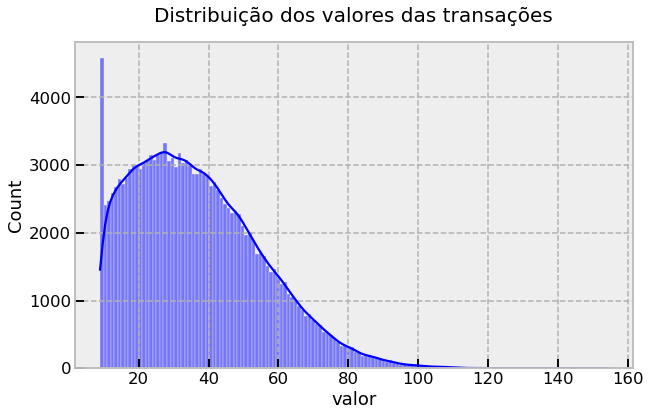

In [9]:
plt.figure(figsize=(10,6))
plt.title('Distribuição dos valores das transações', fontsize=20, pad=20)
ax = sns.histplot(x = 'valor', data=transacoes, kde=True);

> É possível verificar que a distribuição dos valores gastos não é uma distribuição conhecida.

### Distribuição dos valores por fraude

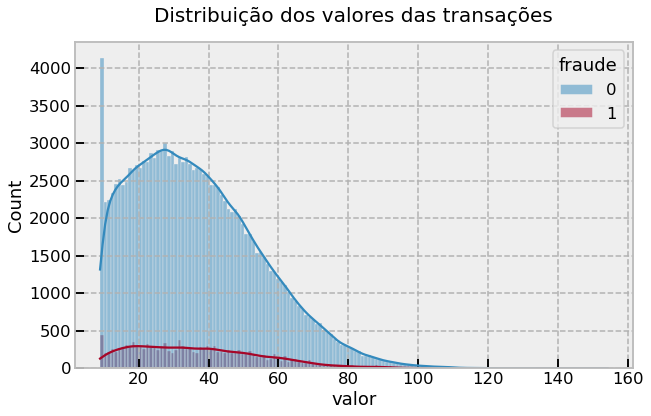

In [10]:
plt.figure(figsize=(10,6))
plt.title('Distribuição dos valores das transações', fontsize=20, pad=20)
ax = sns.histplot(x = 'valor', hue='fraude', data=transacoes, kde=True);

> Note que a proporção de fraudes perante perante a quantidade de transações reais é muito menor.

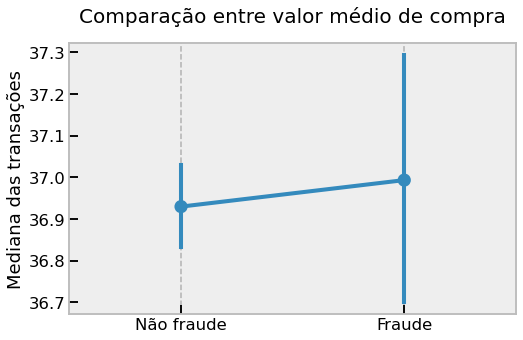

In [11]:
plt.figure(figsize=(8,5))
plt.title('Comparação entre valor médio de compra', fontsize=20, pad=20)
ax = sns.pointplot(x='fraude', y='valor', data=transacoes)
plt.ylabel('Mediana das transações')
plt.xlabel('')

ax.set_xticklabels(['Não fraude', 'Fraude'])
ax.grid()
ax;

> Note que a dispersão dos valores de transações fraudulentas são muito maiores do que a dispersão das transações reais, entretanto a mediano dos valores de compra das transações é relativamente proximo, não varia nem R$0,10.

## Histograma da variável `fonte`

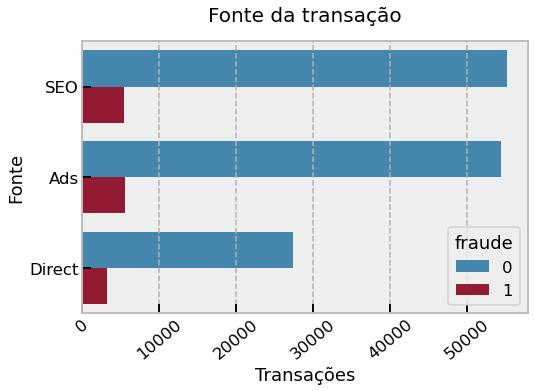

Tabela cruzada Fraude de
acordo com fonte da transação (%)



fonte,Ads,Direct,SEO
fraude,,,
0,90.79,89.46,91.07
1,9.21,10.54,8.93


*Normalizado pela fonte.



In [12]:
plt.figure(figsize=(8,5))
plt.title('Fonte da transação', fontsize=20, pad=20)
ax = sns.countplot(y='fonte', hue='fraude', data=transacoes)
ax.set_ylabel('Fonte')
ax.set_xlabel('Transações')
plt.xticks(rotation=40)
plt.show()


print('Tabela cruzada Fraude de\nacordo com fonte da transação (%)\n')
display((pd.crosstab(transacoes.fraude, transacoes.fonte, normalize='columns') * 100).round(2))
print('*Normalizado pela fonte.\n')


> Podemos inferir que visualmente não faz diferença a fonte da transação real ou fraudulenta. Abaixo coloquei uma tabela indicando a fonte da transação e a proporção de transações reais e falsas. É possível verificar que das transações cuja fonte é `Direct` 89.46% é real e 10.54% é falsa.

## Histrograma dos `browsers`

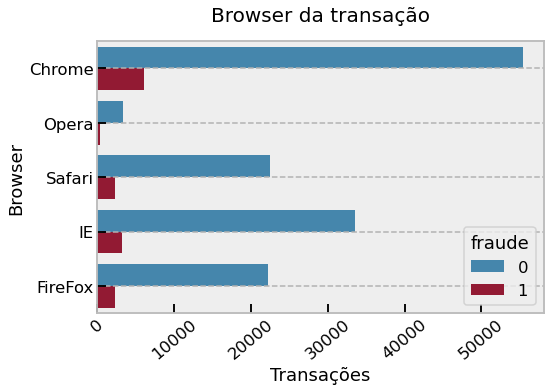

Tabela cruzada Fraude de
acordo com o browser (%)



browser,Chrome,FireFox,IE,Opera,Safari
fraude,,,,,
0,90.12,90.48,91.32,91.08,90.98
1,9.88,9.52,8.68,8.92,9.02


*Normalizado pelo tipo do browser


In [13]:
plt.figure(figsize=(8,5))
plt.title('Browser da transação', fontsize=20, pad=20)
ax = sns.countplot(y='browser', hue='fraude', data=transacoes)
ax.set_ylabel('Browser')
ax.set_xlabel('Transações')
plt.xticks(rotation=40)
plt.grid()
plt.show()

print('Tabela cruzada Fraude de\nacordo com o browser (%)\n')
display((pd.crosstab(transacoes.fraude, transacoes.browser, normalize='columns') * 100).round(2))
print('*Normalizado pelo tipo do browser')


> Novamente, a proporção entre fraude e transações reais se mantém. Geralmente 10% das transações são falsas e outro 90% são transações reais, independente do navegador (browser) utilizado.

## Fraudes por gênero 

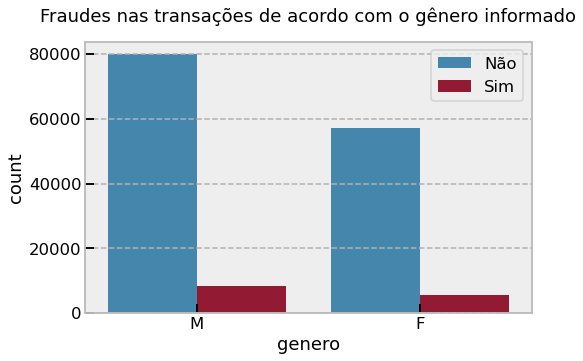

Tabela cruzada Fraude de
acordo com gênero informado (%)



genero,F,M
fraude,,
0,90.9,90.45
1,9.1,9.55


*Normalizado pelo gênero informado


In [14]:
plt.figure(figsize=(8,5))
plt.title('Fraudes nas transações de acordo com o gênero informado', fontsize=18, pad=20)
ax = sns.countplot(x='genero', hue='fraude', data=transacoes)
ax.legend(['Não', 'Sim'])
plt.show()

print('Tabela cruzada Fraude de\nacordo com gênero informado (%)\n')
display((pd.crosstab(transacoes.fraude, transacoes.genero, normalize='columns') * 100).round(2))
print('*Normalizado pelo gênero informado')

> Podemos ver que a quantidade de trnsações realizada por homens é maior do que a realizada por mulheres, entretanto de forma visual parece que a quantidade de fraudes não depende do sexo.

> Por isso fiz uma tabela cruzada, entre genero e fraude, onde é possível concluir que, do gênero F 90.9% das transações são reais e 9.1% são fraudes, já no gênero M 90.45% das transações são reais e 9.55% são fraudes. 

> Logo, aproximadamente de 9% de todas as transações são fraudes.

## Transações por país


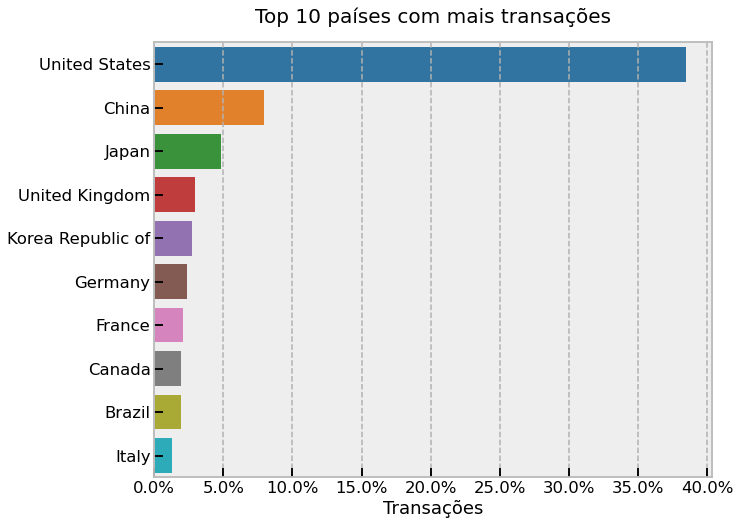

In [140]:
from matplotlib import ticker

paises_10_maiores_transacoes = transacoes.pais.value_counts(ascending=False, 
                                                            normalize=True).drop('missing_country',
                                                                                 axis=0).to_frame()[:10]*100

plt.figure(figsize=(10,8))
plt.title('Top 10 países com mais transações', fontsize=20, pad=20)
ax = sns.barplot(x='pais', y = paises_10_maiores_transacoes.index,  data=paises_10_maiores_transacoes, palette='tab10')
ax.set_xlabel('Transações',)
ax.xaxis.set_major_formatter(ticker.PercentFormatter())
ax;

> É possível verificar que mais de 35% das transações acontecem nos Estados Unidos. Entretanto, **não podemos utilizar isso como um fator determinante para classificar se uma transação é fraude ou não**, precisamos dar um jeito de "padronizar" para que as variáveis fiquem proporcionais.

# Analises entre variáveis
## Análise de ID e IP 

Agora que fizemos algumas visualizações e consideraçoes nos dados sem altera-los propriamente dito, vamos fazer algumas manipulações para correlacionar variaveis. 

Primeiramente vou avaliar os usuários que estão relacionados à apena um endereço de IP

> **objetivo**: contar o número fraudes para cada dispositivo e ip

In [29]:
fraude_por_dispositivo_ip = pd.DataFrame(columns=['fraude','id_por_dispositivo','id_por_ip'])

Para o número de fraudes temos:

In [32]:
fraude_por_dispositivo_ip['fraude'] = transacoes['fraude']
fraude_por_dispositivo_ip.head()

,fraude,id_por_dispositivo,id_por_ip
0,0,NaN,NaN
1,0,NaN,NaN
2,1,NaN,NaN
3,0,NaN,NaN
4,0,NaN,NaN


Para o numero de dispositivos por id temos:

In [83]:
# Agrupa por dispositivos e count() na variável id
id_por_dispositivos = transacoes.groupby('id_dispositivo').id.count()
id_por_dispositivos.head()

id_dispositivo
AAALBGNHHVMKG     1
AAAWIHVCQELTP     1
AAAXJHWCLISKY     1
AAAXXOZJRZRAO    11
AABFGRPBQHWFQ     1
Name: id, dtype: int64

Veja que um único dispositivo tem 11 `id`. Então agora para cada dispositivo em `transações` vamos adicionar a quantidade de `id` que esse dispositivo tem no dataframe `fraude_por_dispositivo_ip`:

In [84]:
def retorta_id_por_dispositivo(id_dispositivo):
    quantidade_id = id_por_dispositivos.loc[id_dispositivo]
    return quantidade_id

# testando
retorta_id_por_dispositivo('AAAXXOZJRZRAO')

11

Deu certo, agora vamos aplicar definitivamente

In [85]:
fraude_por_dispositivo_ip['id_por_dispositivo'] = transacoes.id_dispositivo.apply(retorta_id_por_dispositivo)
fraude_por_dispositivo_ip.head()

,fraude,id_por_dispositivo,id_por_ip
0,0,1,NaN
1,0,1,NaN
2,1,12,NaN
3,0,1,NaN
4,0,1,NaN


Veja que deu certo, um único dispositivo tem 12 `id` e a classificação dele é de fraude. 

Agora vamos contar quantos `id` tem cada `ip` agrupando pelo numero de `ip` e contando quandos `id` estão associados a ele:

In [97]:
id_por_ips = transacoes.groupby('ip').id.count()
id_por_ips

ip
5.209350e+04    1
9.344714e+04    1
1.058185e+05    1
1.175667e+05    1
1.314238e+05    1
               ..
4.294674e+09    1
4.294715e+09    1
4.294720e+09    1
4.294822e+09    1
4.294850e+09    1
Name: id, Length: 143512, dtype: int64

In [99]:
def retorna_id_por_ip(ip):
    quantidade_id = id_por_ips[ip]
    return quantidade_id

# testando
retorna_id_por_ip(transacoes.ip.iloc[50])

1

>**observação**: O fato do IP ser um int pode dificultar ao chamar ele através do índex de uma `Series` ou `DataFrame`.


Agora vamos aplicar para cada `ip` em `transacoes` ver quantos `id` estão associados:

In [100]:
fraude_por_dispositivo_ip['id_por_ip'] = transacoes.ip.apply(retorna_id_por_ip)
fraude_por_dispositivo_ip

,fraude,id_por_dispositivo,id_por_ip
0,0,1,1
1,0,1,1
2,1,12,12
3,0,1,1
4,0,1,1
...,...,...,...
151107,1,2,1
151108,0,1,1
151109,0,1,1
151110,0,2,1


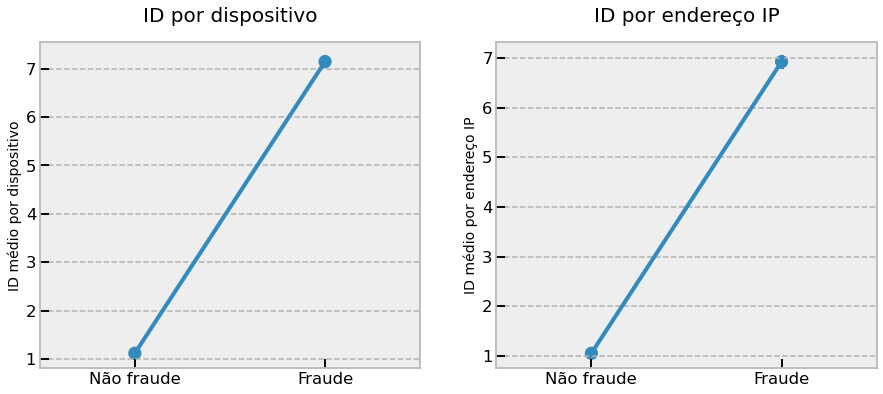

In [120]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('ID por dispositivo', fontsize=20, pad=20)
ax1 = sns.pointplot(data = fraude_por_dispositivo_ip, x = 'fraude', y = 'id_por_dispositivo')
ax1.set_xticklabels(['Não fraude', 'Fraude'])
ax1.set_xlabel('')
ax1.set_ylabel('ID médio por dispositivo', fontsize=14)


plt.subplot(122)
plt.title('ID por endereço IP', fontsize=20, pad=20)
ax2 = sns.pointplot(data = fraude_por_dispositivo_ip, x = 'fraude', y = 'id_por_ip')
ax2.set_xlabel('')
ax2.set_xticklabels(['Não fraude', 'Fraude'])
ax2.set_ylabel('ID médio por endereço IP', fontsize=14)

plt.show()

### Comentário sobre análise de ID e IP por dispositivo

> É possivel verificar que **a média de ID por dispositivo é um** na primeira imagem onde indica transações reais, acontece que para **transações classificadas como fraude a média é de 7 id por dispositivos**. Ou seja, a quantidade de `id_por_dispositivo` é importante para decidir se as transações são fraudes ou não.

> Para o caso de ID por endereços de IP acontece algo parecido, em geral **transações reais tem em média um IP por IP** já as **transações fraudulentas tem em média 7 ID's por endereços IP**. Portanto, a quantidade de IP por dispositivo também é um indicador de fraude nestes dados.

## Análise de inscrição e tempo de compra

Dado que temos disponíveis informações sobre cadastro e hora de transação, podemos fazer algumas análises referênte a essa variação entre cadastro e compra.

A nova variável sera a diferença entre o tempo de compra e o cadastro:

In [130]:
transacoes['compra'] - transacoes['cadastro']

0        52 days 03:51:22
1         0 days 04:59:04
2         0 days 00:00:01
3         5 days 16:41:25
4        50 days 11:31:01
               ...       
151107   60 days 21:27:13
151108   10 days 18:41:10
151109   77 days 08:00:16
151110   59 days 13:28:39
151111   40 days 19:01:33
Length: 151112, dtype: timedelta64[ns]

Note que essa diferença é dada em dias, podemos converte-la em segundos através do atributo `datetime.seconds` de cada elemento do objeto `datetime`:

In [131]:
transacoes['tempo'] = (transacoes['compra'] - transacoes['cadastro']).apply(lambda delta_tempo: delta_tempo.seconds)
transacoes['tempo']

0         13882
1         17944
2             1
3         60085
4         41461
          ...  
151107    77233
151108    67270
151109    28816
151110    48519
151111    68493
Name: tempo, Length: 151112, dtype: int64

Agora temos a quantidade em segundos e podemos verificar se este valor tem alguma correlação entre as fraudes:

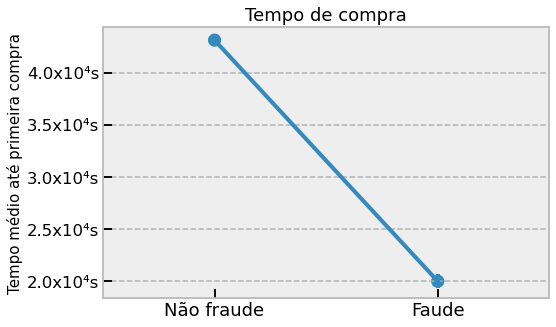

In [158]:
plt.title('Tempo de compra')
ax = sns.pointplot(data = transacoes, x = 'fraude', y = 'tempo')
ax.figure.set_size_inches(8,5)
ax.set_ylabel('Tempo médio até primeira compra', fontsize=15)
ax.set_xlabel('')
ax.set_xticklabels(['Não fraude','Faude'], fontsize=18)
ax.yaxis.set_major_formatter(lambda x, pos: f'{(x / 10000)}x10⁴s')
ax;

### Comentário sobre o tempo de compra

> Note que as **transações reais geralmente demoram algum tempo para que seja feita alguma compra**, diferente das **transações fraudulentas que geralmente tem um tempo menor**. Portanto, pode ser o caso de existir uma correlação inversa: Quanto maior o tempo até a primeira compra, menor a chance de ser uma fraude.

É possível analisar também em que horas as fraudes costumam à acontecer:

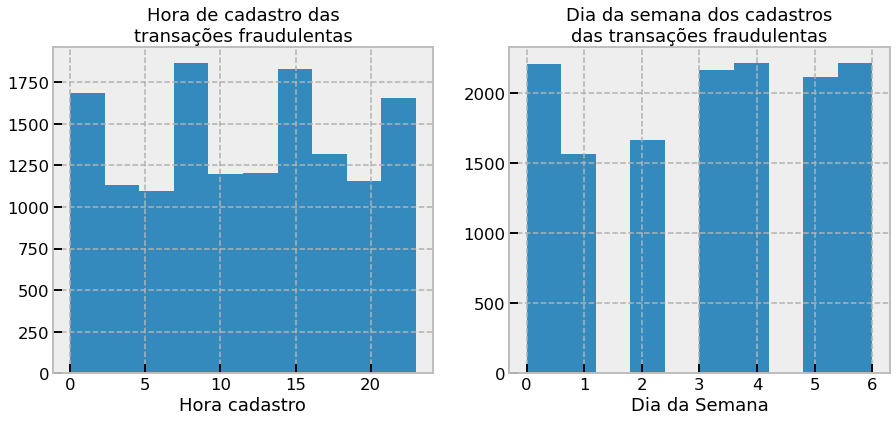

In [169]:

plt.figure(figsize=(15,6))
ax1 = plt.subplot(121)
ax1.set_title('Hora de cadastro das\ntransações fraudulentas')
ax1 = transacoes[transacoes.fraude == 1 ].cadastro.apply(lambda x: x.hour).hist()
ax1.set_xlabel('Hora cadastro')

ax2 = plt.subplot(122)
ax2.set_title('Dia da semana dos cadastros\ndas transações fraudulentas')
ax2 = transacoes[transacoes.fraude == 1 ].cadastro.apply(lambda x: x.dayofweek).hist()
ax2.set_xlabel('Dia da Semana')

plt.show()

Podemos verificar também se ocorrem fraudes ao longo das semanas do ano, uma hipotese:

> **Aumentam as fraudes em semanas de eventos festivos/liquidações**

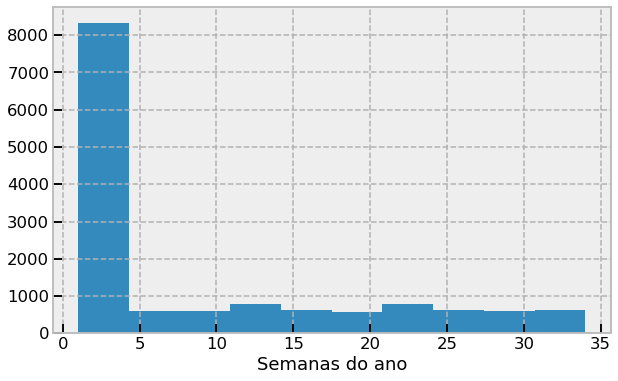

In [193]:
plt.figure(figsize=(10,6))
ax = transacoes[transacoes.fraude == 1 ].cadastro.apply(lambda x: x.week).hist()
ax.set_xlabel('Semanas do ano')

ax;

### Comentário sobre as fraudes em função das semanas do ano

> Note que a quantidade de fraudes nas três primeiras semanas do ano são bem maiores do que as outras, ou seja, as semanas de cadastros de contas podem ser um indicador de fraudes, entretanto não sabemos se é um critério definitivo, porque é possível que mais pessoas criem contas neste período por causa de "sobras de natal e ano novo". Então o melhor a se fazer é indicar ao setor de segurança quê **durante o primeiro mês do ano, mais precisamente durante as três primeiras semanas, a quantidade de fraudes aumenta vertiginosamente, logo é importante reforçar o atendimento ao cliente e sistemas de segurança neste periogo**